In [1]:
import re
import spacy
import matplotlib.pyplot as plt
import json
from wordcloud import WordCloud

In [2]:
nlp = spacy.load('en')

In [ ]:
with open('../data/op_task/heldout_op_data.jsonlist', 'r') as f:
    data = f.read()
    
topics = []
errors = 0

for line in re.findall(r'\{(.*?)\}', data):
    try:
        line = '{' + line + '}'
        line = line.replace('"delta_label": true', '"delta_label": True')
        line = line.replace('"delta_label": false', '"delta_label": False')
        topic = eval(line)
        topic['selftext'] = re.sub(r'\*(.*?)\*', '', topic['selftext'])
        topics.append(topic)
    except:
        errors += 1
        
with open('../data/titles_heldout.json', 'w') as f:
    json.dump(topics, f)

In [3]:
with open('../data/titles_heldout.json', 'r') as f:
    topics = json.load(f)

In [4]:
titles = ''

for topic in topics:
    titles += topic['title'][4:]

In [5]:
doc = nlp(titles)

In [6]:
useful = {'VERB', 'NOUN', 'PROPN'}
non_stop_words = ''

for token in doc:
    if not token.is_stop and token.pos_ in useful:
        non_stop_words += token.text
        non_stop_words += ' '

In [7]:
wordcloud = WordCloud().generate(non_stop_words)

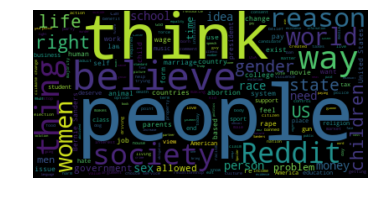

In [8]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
changed = 0

for topic in topics:
    if topic['delta_label']:
        changed += 1
        
stayed = len(topics) - changed

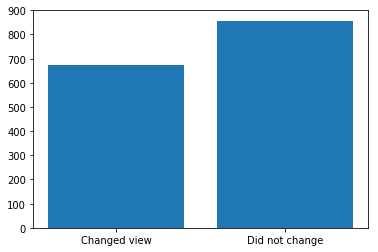

In [10]:
x = [1, 2]
plt.bar(x, [changed, stayed])
plt.xticks(x, ('Changed view', 'Did not change'))
plt.show()